In [1]:
%config Completer.use_jedi = False

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

import sys
sys.path.insert(0, "/home/laadd/DDP/B-SOID/")

import seaborn as sns
from BSOID.bsoid import *
import scipy
from scipy.spatial.distance import squareform

/home/laadd/anaconda3/envs/bsoid/lib/python3.7/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)


In [3]:
ea_mat = np.load("/fastscratch/laadd/eac_runs/eac_mat.npy")

In [17]:
def cluster_eac(M, pvalue=None):
    Z = scipy.cluster.hierarchy.linkage(squareform(M), method="single")
    
    if pvalue is None:
        fig, ax = plt.subplots(figsize=(6, 9))
        ddata = scipy.cluster.hierarchy.dendrogram(Z, ax=ax)
        ylocs = []
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            ax.plot([0, x], [y, y], '--g')
            ylocs.append(y)

        plt.show()

        pvalue = float(input("p-value for choosing split: "))
    
    fig, ax = plt.subplots(figsize=(6, 9))
    scipy.cluster.hierarchy.dendrogram(Z, ax=ax)
    xlim = ax.get_xlim()
    ax.plot([0, xlim[1]], [pvalue, pvalue], '--r')
    
    plt.savefig("/home/laadd/dendogram.jpg", dpi=500, bbox_inches="tight", pad_inches=0)
    plt.show()
    
    group_labels = scipy.cluster.hierarchy.fcluster(Z, t=pvalue, criterion="distance")
    return group_labels

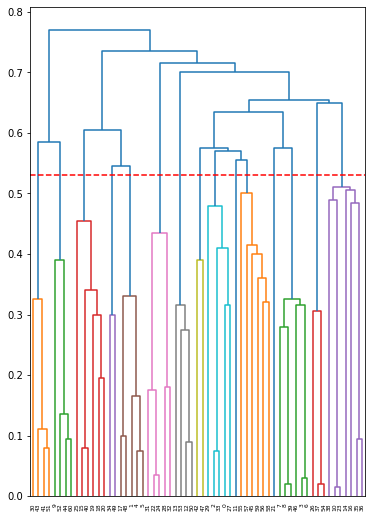

In [18]:
glabels = cluster_eac(ea_mat, pvalue=0.53)

In [6]:
def cluster_grouping(glabels):
    labs = np.unique(glabels)
    
    groups = {}
    for lab in labs:
        groups[lab] = np.where(glabels == lab)[0]
    return groups
groups = cluster_grouping(glabels)

In [10]:
groups[3]

array([15, 18, 19, 20, 25, 40])